### Student Information
Name: 盧奕呈

Student ID: 103061135

GitHub ID: eugeneALU

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

# First Part

In [49]:
### Begin Assignment Here
import pandas as pd
import helpers.data_mining_helpers as dmh
from sklearn.datasets import fetch_20newsgroups

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [50]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [51]:
#Answer here
print(X.at[5,'category_name'])
print(X.iat[5,2])

soc.religion.christian
soc.religion.christian


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [52]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df


,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [53]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [54]:
# Answer here
# the problem is that when we print out the data of the string - "NaN", it will also shown as NaN. However there is actually
# some data in that entry(string is also a object, as well as string "NONE" which is different from real NONE).
# Also, '', empty string is in same situation. So when we want to present a NAN data as string-"NAN",string-"NONE" or
# empty string, which we want to represent NAN data, Pandas will give as unexpected answer.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [55]:
X_sample = X.sample(n=1000) #random state
# Answer here
# The index is no longer in order
X_sample[0:10]
# the first 10 index is no longer 0 to 9

,text,category,category_name
532,From: lusardi@cs.buffalo.edu (Christopher Lusa...,1,comp.graphics
1849,From: kaufman@Xenon.Stanford.EDU (Marc T. Kauf...,1,comp.graphics
1619,From: deweeset@ptolemy2.rdrc.rpi.edu (Thomas E...,1,comp.graphics
179,From: boebert@sctc.com (Earl Boebert) Subject:...,1,comp.graphics
1922,From: baalke@kelvin.jpl.nasa.gov (Ron Baalke) ...,1,comp.graphics
1837,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
365,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
1193,From: watson@madvax.uwa.oz.au (David Watson) S...,1,comp.graphics
1371,From: bil@okcforum.osrhe.edu (Bill Conner) Sub...,0,alt.atheism
851,From: sciysg@nusunix1.nus.sg (Yung Shing Gene)...,3,soc.religion.christian


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

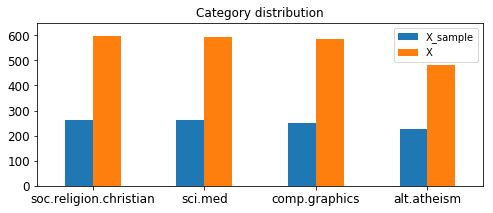

In [57]:
# Answer here
combine = pd.concat([X_sample.category_name.value_counts(),X.category_name.value_counts()], axis=1, keys=['X_sample','X'],sort=False)
combine.plot(kind = 'bar',title = 'Category distribution',ylim = [0, 650],rot = 0, fontsize = 12, figsize = (8,3))

In [58]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

analyze = count_vect.build_analyzer()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [59]:
# Answer here
pos = np.where((X_counts[4,0:100]==1).toarray()[0] == True)[0][1]
count_vect.get_feature_names()[pos]

'01'

In [60]:
import seaborn as sns
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

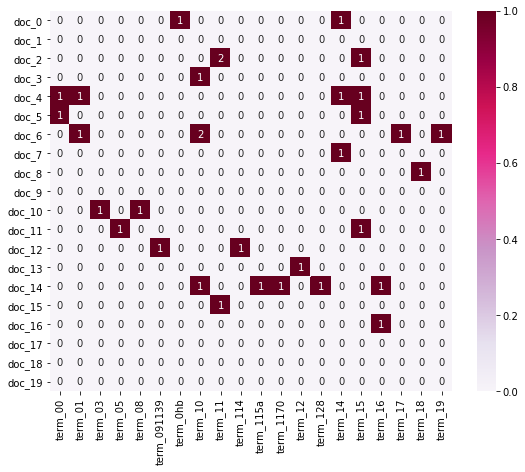

In [61]:
# Answer here
# drop the term that first 20 document has 0 value
index = []
for i in range(X_counts[0:20, :].shape[1]):
    if (X_counts[0:20,i].toarray()==1).sum()>0:
        index.append(i)
    if len(index)==20:
        break
plot_z = X_counts[0:20, index].toarray()
plot_x = ["term_"+str(count_vect.get_feature_names()[i]) for i in index]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [62]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

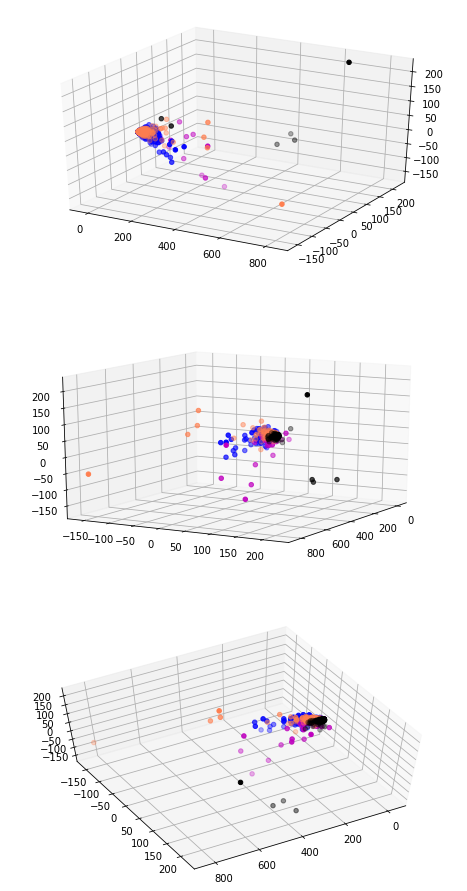

In [63]:
# Answer here
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,16))
ax1= fig.add_subplot(311,projection='3d')
ax2= fig.add_subplot(312,projection='3d')
ax2.view_init(15, 30)
ax3= fig.add_subplot(313,projection='3d')
ax3.view_init(60, 60)

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
   
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

plt.show()
# In 2D graph, blue and orange dots seems gather together. But in 3D graph (especially first plot), we can observe that
# orange actually different from blue dots. Also, black group are also seperated from blue and orange dots which is also
# cannot be observed in 2D plot

In [64]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [65]:
# Answer here
import plotly.graph_objects as go
import plotly.express as px

NAME = ['term_' + s for s in count_vect.get_feature_names()[0:300]]
fig = go.Figure()
fig.add_trace(go.Bar(x=NAME,
                     y=term_frequencies.tolist()[0:300],
                    ))
fig.update_layout(xaxis_tickangle=-90)
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


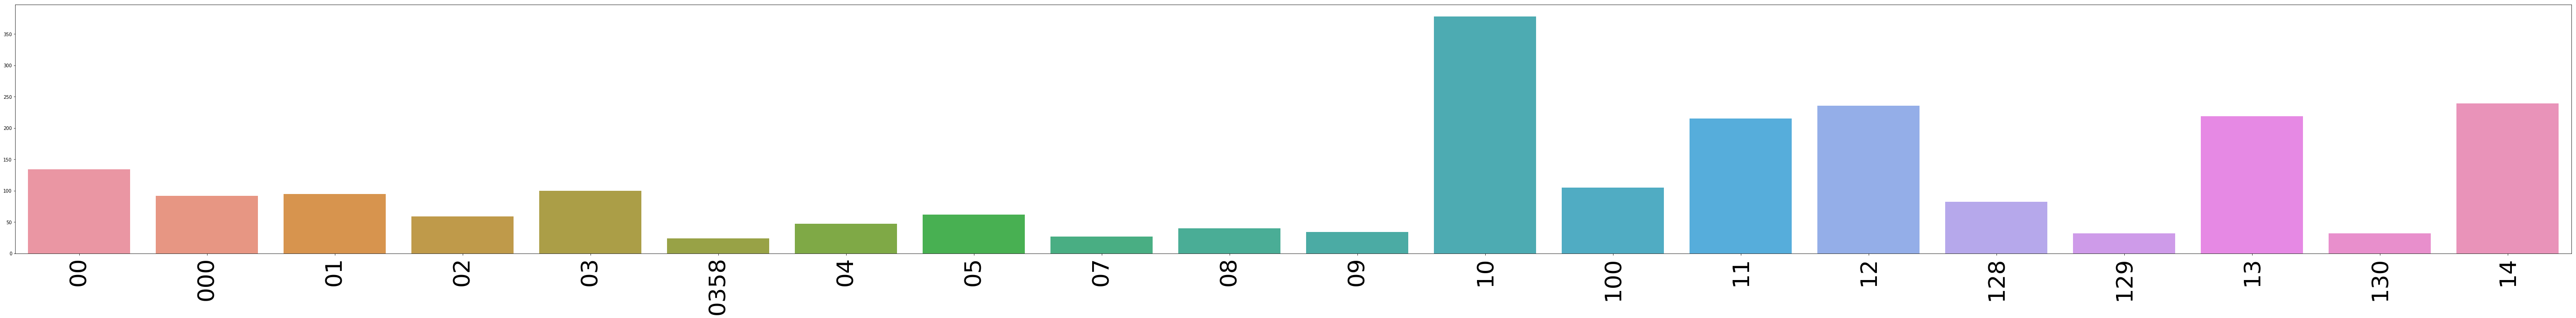

In [66]:
# Answer here
NAME = np.array(count_vect.get_feature_names())[term_frequencies>20][0:20]
NUM = term_frequencies[term_frequencies>20][0:20] #only plot the terms that greater than 20 (ignore values that is too small)
        
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=NAME, y=NUM)
g.set_xticklabels(NAME, rotation=90, fontsize=50);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

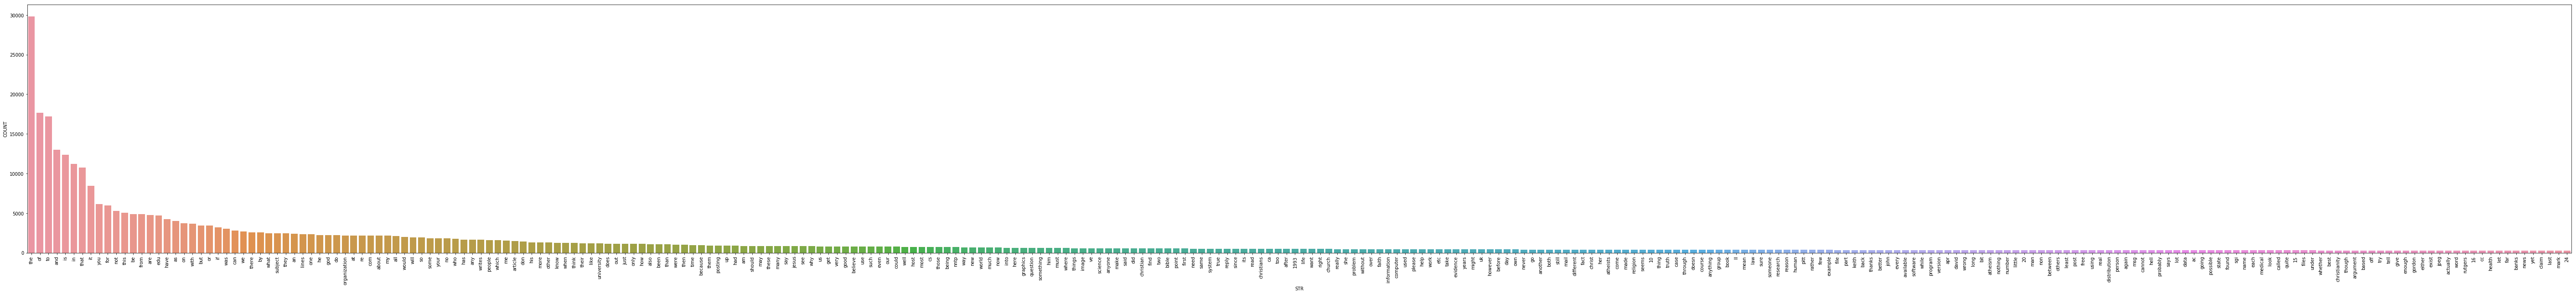

In [67]:
# Answer here
d = {'STR': count_vect.get_feature_names(), 'COUNT': term_frequencies}
DATA = pd.DataFrame(data=d)
DATA = DATA.sort_values(by='COUNT',ascending=False)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=DATA.STR[:300], 
            y=DATA.COUNT[:300])
g.set_xticklabels(DATA.STR[:300], rotation = 90);

In [68]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [69]:
# Answer here 
# Yes it works!!!
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


# Second Part

In [70]:
import pandas as pd
import helpers.data_mining_helpers as dmh

# Read in the full txt file and split each row by split('\n')
# Since there is an empty row in the end of the file, I need to drop it
with open('.\\sentiment\\amazon_cells_labelled.txt', 'r') as content_file:
    Content = content_file.read()
    Amazon = Content.split('\n')[:-1]
with open('.\\sentiment\\Imdb_labelled.txt', 'r',encoding='UTF-8') as content_file:
    Content = content_file.read()
    Imdb = Content.split('\n')[:-1]
with open('.\\sentiment\\yelp_labelled.txt', 'r') as content_file:
    Content = content_file.read()
    Yelp = Content.split('\n')[:-1]
    
#combine all data into a whole list
Data = Amazon+Imdb+Yelp

In [71]:
#Split Sentences and Label
Sentences = []
Label = []
for row in Data:
    Sentences.append(row.split('\t')[0])
    Label.append(int(row.split('\t')[1])) #convert to int

In [72]:
X = pd.DataFrame({'Sentences': Sentences,'Label': Label}) #convert to dataframe
X.loc[:10]

,Label,Sentences
0,0,So there is no way for me to plug it in here i...
1,1,"Good case, Excellent value."
2,1,Great for the jawbone.
3,0,Tied to charger for conversations lasting more...
4,1,The mic is great.
5,0,I have to jiggle the plug to get it to line up...
6,0,If you have several dozen or several hundred c...
7,1,If you are Razr owner...you must have this!
8,0,"Needless to say, I wasted my money."
9,0,What a waste of money and time!.


In [73]:
#check the dataframe whether have nan
X.isnull().all()

Label        False
Sentences    False
dtype: bool

In [74]:
# check whether there are duplicated sentences
X.duplicated().all()

False

In [75]:
# Sample the data
X_sample = X.sample(n=500) #random sample 500 samples
X_sample[0:10]

,Label,Sentences
1824,1,"Mark my words, this is one of those cult films..."
2641,0,I'm not eating here!
710,0,Can't store anything but phone numbers to SIM.
566,0,Cumbersome design.
2347,1,"Classy/warm atmosphere, fun and fresh appetize..."
1675,1,Julian Fellowes has triumphed again.
9,0,What a waste of money and time!.
2921,0,This place is disgusting!
2930,0,"The food is about on par with Denny's, which i..."
482,1,"After charging overnight, these batteries work..."


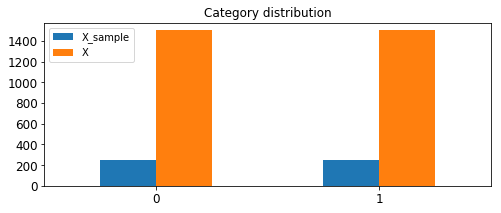

In [76]:
# Plot the whole data and the sample data
combine = pd.concat([X_sample.Label.value_counts(),X.Label.value_counts()], axis=1, keys=['X_sample','X'],sort=False)
combine.plot(kind = 'bar',title = 'Category distribution',rot = 0, fontsize = 12, figsize = (8,3))

# Third Part

1    1500
0    1500
Name: Label, dtype: int64


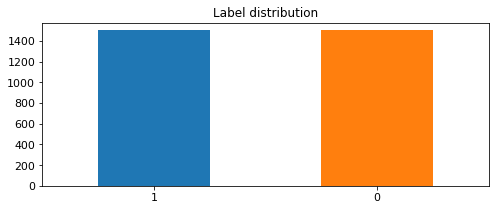

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

print(X.Label.value_counts()) #equally distribution 
# plot barchart for X
X.Label.value_counts().plot(kind = 'bar',
                            title = 'Label distribution',       
                            rot = 0, fontsize = 11, figsize = (8,3))


In [78]:
from sklearn.feature_extraction.text import CountVectorizer

#use the CountVectorizer first to have some figure
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentences)
#result 
print(X_counts.shape)
count_vect.get_feature_names()[0:10]

(3000, 5155)


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

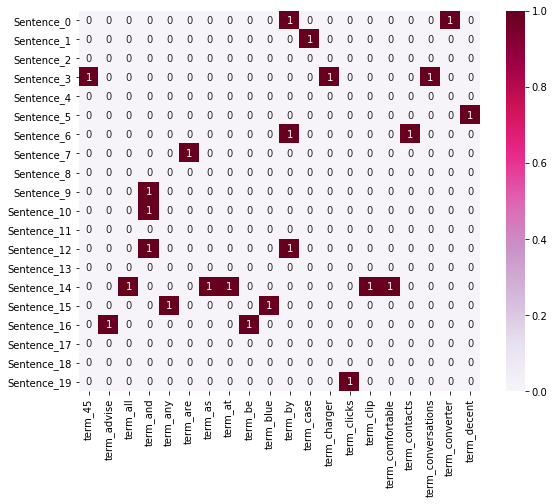

In [79]:
# draw the count words' heat map. 
# Only select the term that has none zero value in first 20 sentences(like what have done in First Part)
import seaborn as sns

index = []
for i in range(X_counts[0:20, :].shape[1]):
    if (X_counts[0:20,i].toarray()==1).sum()>0: #only include none 0 terms
        index.append(i)
    if len(index)==20:
        break
        
plot_x = ["term_"+str(count_vect.get_feature_names()[i]) for i in index]
plot_y = ["Sentence_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, index].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

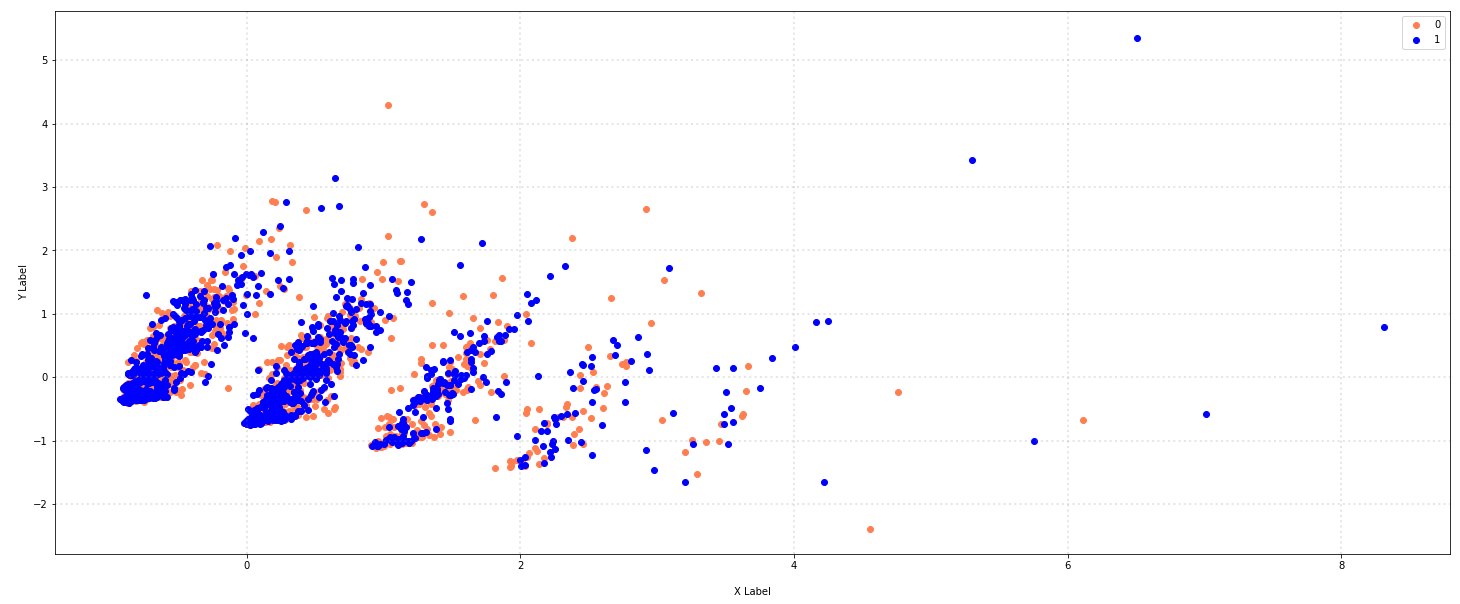

In [80]:
# Try PCA
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

#only has two label here
categories = [0, 1]
color = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(color, categories):
    xs = X_reduced[X['Label'] == category].T[0]
    ys = X_reduced[X['Label'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.legend(['0','1'],loc='upper right')

plt.show()
# The result shows some interesting pattern

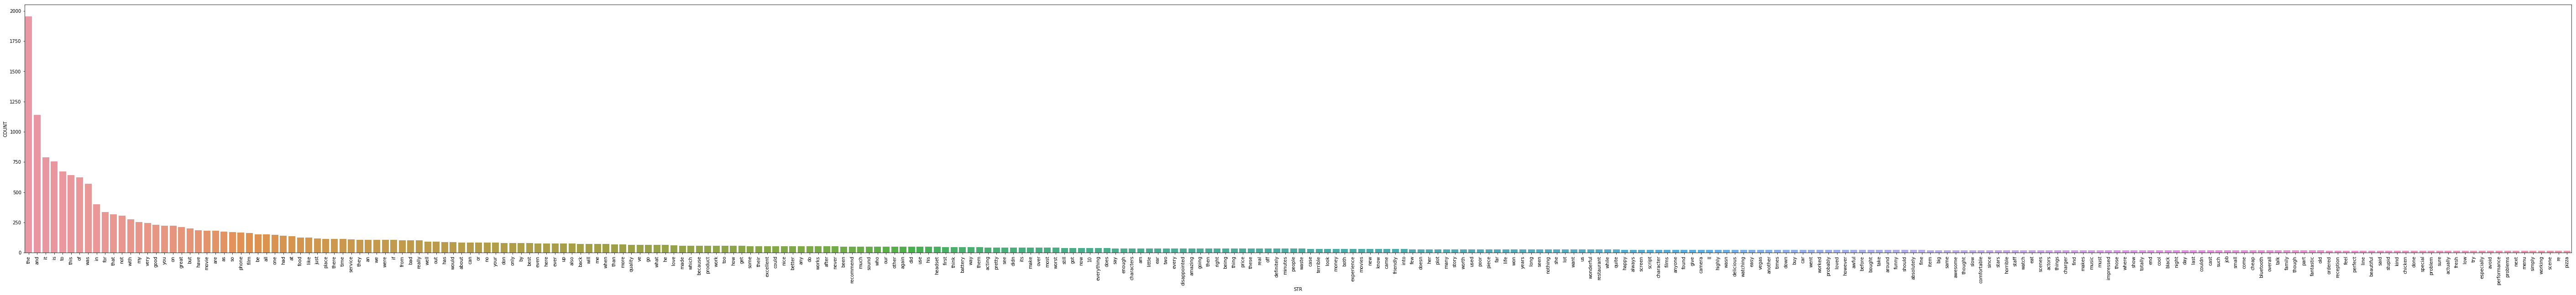

In [81]:
# Try to plot the term frequencies (after sorting)
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
    
d = {'STR': count_vect.get_feature_names(), 'COUNT': term_frequencies}
DATA = pd.DataFrame(data=d)
DATA = DATA.sort_values(by='COUNT',ascending=False)

plt.subplots(figsize=(100, 10))
#like what have done in First Part only plot first 300 terms
g = sns.barplot(x=DATA.STR[:300], 
            y=DATA.COUNT[:300])
g.set_xticklabels(DATA.STR[:300], rotation = 90);

## TFIDF

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(X.Sentences)

In [83]:
#explore tfidf
print(tfidf.shape)
print(tfidf)

(3000, 5155)
  (0, 4161)	0.18746612963796122
  (0, 4545)	0.20763211346881047
  (0, 2427)	0.12068394874592436
  (0, 3043)	0.2233953446781101
  (0, 4987)	0.2491294046459131
  (0, 1829)	0.1562076631086733
  (0, 2809)	0.22865092628677172
  (0, 4609)	0.12748933093019277
  (0, 3387)	0.3086188222683411
  (0, 2432)	0.11981679118086062
  (0, 2314)	0.29561117077545607
  (0, 2158)	0.22277715355242933
  (0, 4531)	0.08671624087955354
  (0, 4835)	0.2754107317478931
  (0, 4793)	0.3318790878324875
  (0, 1982)	0.2315120239113502
  (0, 647)	0.2233953446781101
  (0, 1013)	0.39829526887338346
  (1, 1993)	0.3364192842689825
  (1, 713)	0.513063291919973
  (1, 1603)	0.47072204948062
  (1, 4861)	0.6340416987777308
  (2, 1829)	0.352293799045279
  (2, 4531)	0.1955703921972776
  (2, 2023)	0.3996123298170515
  :	:
  (2999, 4545)	0.15290380344052165
  (2999, 4609)	0.09388530161179547
  (2999, 2432)	0.08823511344907806
  (2999, 2314)	0.10884653533583222
  (2999, 4531)	0.19157792350661484
  (2999, 647)	0.16451211376

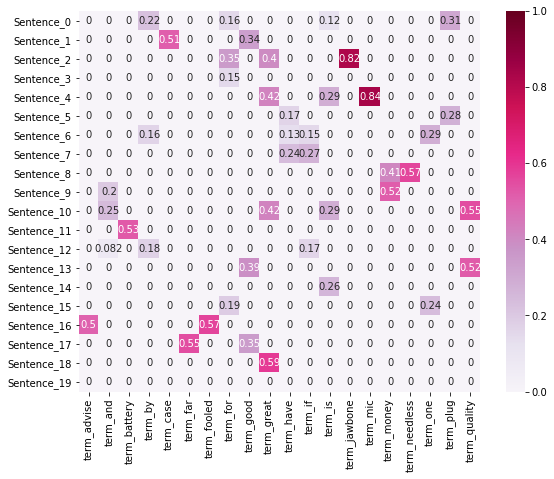

In [84]:
# convert tfidf to normal array which will be easier to plot
tfidf_array = tfidf.toarray()

# plot the heat map which is same as above(First Part)
index = []
for i in range(X_counts[0:20, :].shape[1]):
    if (tfidf_array[0:20,i]).sum()>0.5:      # slightly change from above. only plot the term that have big enough tfidf
        index.append(i)
    if len(index)==20:
        break
        
plot_x = ["term_"+str(count_vect.get_feature_names()[i]) for i in index]
plot_y = ["Sentence_"+ str(i) for i in list(X.index)[0:20]]
plot_z = tfidf_array[0:20, index]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

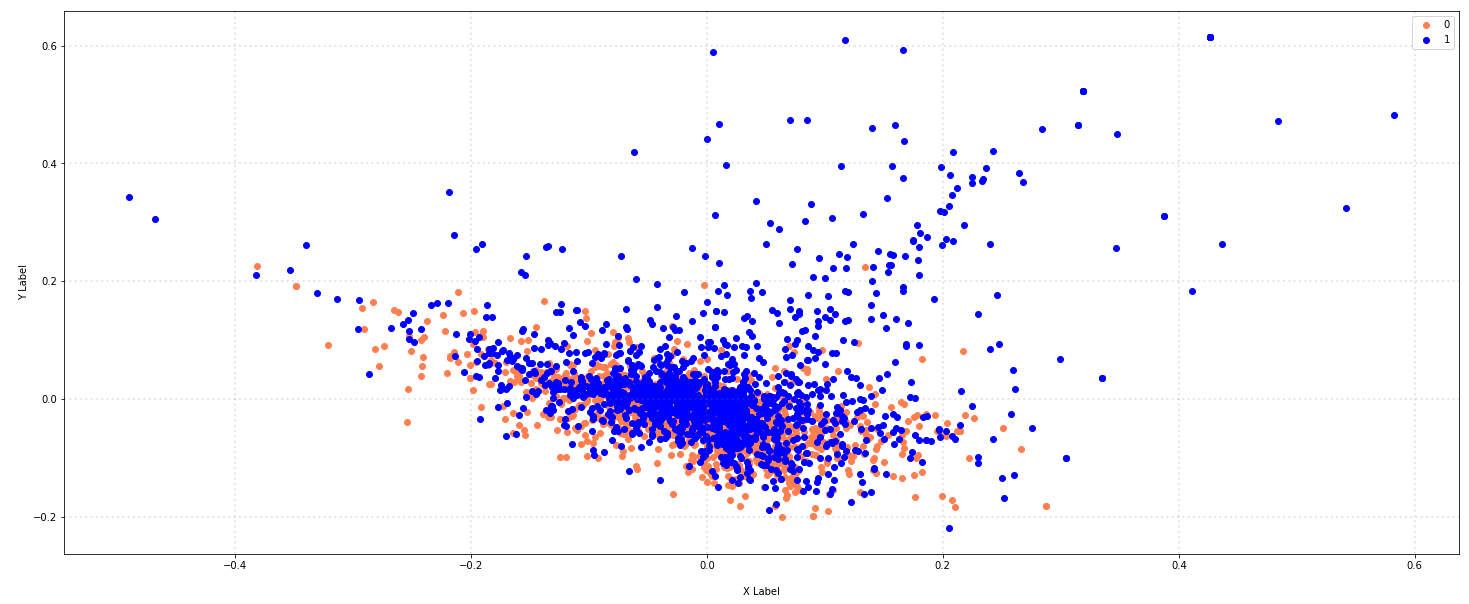

In [85]:
# plot tfidf also using PCA
tfidf_reduced = PCA(n_components = 2).fit_transform(tfidf_array)

#only has two label here
categories = [0, 1]
color = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(color, categories):
    xs = tfidf_reduced[X['Label'] == category].T[0]
    ys = tfidf_reduced[X['Label'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.legend(['0','1'],loc='upper right')

plt.show()
# actually the two group are not distributing differently

 ## Naive Bayes classifier 

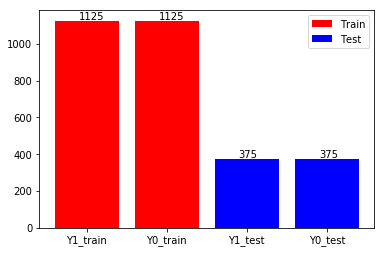

In [86]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(tfidf_array , X.Label, test_size=0.25)
    
#plot the train and test label distribution
Y1_train = (Y_train==1).sum()
Y0_train = len(Y_train) - Y1_train
Y1_test = (Y_test==1).sum()
Y0_test = len(Y_test) - Y1_test

# label to show on the graph
label = [str(Y1_train), str(Y0_train), str(Y1_test), str(Y0_test)]

# The X position of bars
r1 = [1,2]
r2 = [3,4]
r = r1+r2

# bars value
bar1 = [Y1_train, Y0_train]
bar2 = [Y1_test, Y0_test]
bar = bar1 + bar2 

plt.bar(r1, bar1, color = 'r', label='Train')
plt.bar(r2, bar2, color = 'b', label='Test')

# Text on the top of each barplot
for i in range(len(r)):
    plt.text(x = r[i]-0.1 , y = bar[i]+5, s = label[i], size = 10)

plt.xticks(r ,['Y1_train', 'Y0_train', 'Y1_test', 'Y0_test'])   
plt.legend()

Accuracy =  0.804
AUC =  0.8904746666666666


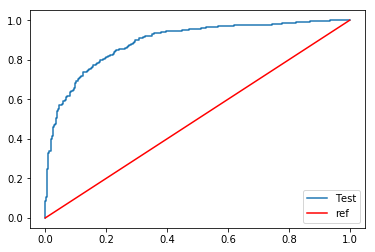

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Train the model 
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

#predict
predict = mnb.predict(X_test)
predict_score = mnb.predict_proba(X_test)[:,1] #only choose the probability that predicted to be 1

#performance
ACCU = accuracy_score(Y_test, predict) # accuracy 
AUC = roc_auc_score(Y_test, predict_score)
fpr, tpr, thresholds = roc_curve(Y_test, predict_score)

print("Accuracy = ", ACCU)
print("AUC = ", AUC)

plt.plot(fpr, tpr, Label='Test')
plt.plot([0,1],[0,1], 'r-', Label="ref") # reference line
plt.legend(loc='lower right')


## Fourth Part

1. The first problem is that when we are calculating the term_frequencies, it will take lots of time. However, the resulting array is very sparse (like TF-IDF) also some words might only appear in one sentneces. We might can delete some special and rare words beforehand. Then, we can process the sentences more quickly and also obtain smaller array.
2. The other problem is that those special words might affect the label (such as sentiment here) a lot, so which word sould be filter out beforehand need some insight of the dataset.
3. There are lots of terms are actually "numbers" and they seems not related to the semantic of the sentences. So I think we can remove all the numbers beforehand instead of view them as the term, which can speed up the processing of the dataset(since we have less terms needs to be processed).
